<a href="https://colab.research.google.com/github/GenoaroSJr/DataScienceSmarkio/blob/main/An%C3%A1liseExplorat%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação de bibliotecas

In [2]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

# Import e tratamento dos dados

Nessa seção, foram importados os dados necessários para a análise estatistica descritica e inferencial. para que fossem melhor aplicados posteriormente, criou-se um novo documento "df_sort", onde as classes são organizadas de forma crescente.


In [16]:
drive.mount("/content/drive/")
df = pd.read_excel("/content/drive/MyDrive/teste_smarkio_Lbs.xls")
df_sort = pd.read_csv("/content/drive/MyDrive/Smarkio/Tabela_sort.csv")
#df.sort_values(by=['Pred_class']).to_csv("/content/drive/MyDrive/Smarkio/Tabela_sort.csv")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [17]:
df.head(5) #mostrando a tabela original disponibilizada pela Smarkio

,Pred_class,probabilidade,status,True_class
0,2,0.079892,approved,0.0
1,2,0.379377,approved,74.0
2,2,0.379377,approved,74.0
3,2,0.420930,approved,74.0
4,2,0.607437,approved,NaN


> Como so dados da coluna "True_class" estão incompletos (há valores "NaN"), vamos trata-los para que os dados possam tormar uma forma mais consistetente.

Obs: Aqui, iremos reconstruir a coluna "True_class" com os dados verdadeiros. Lembrando que se a classe True_class é nula, então o modelo acertou, portanto, iremos assumir a "Pred_class".

> Aqui iremos tratar os dados para mostrar na "Pred_class" se o modelo acertou ou errou a predição. Portanto, iremos descreve-lo como **0** se **errou** e como **1** se **acertou**

In [18]:
x = len(df)

Truee = df['True_class']
Pred = df['Pred_class']

for i in range(x):
  if (Truee[i] >= 0):
    ...
  else:
    Truee[i] = Pred[i]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [19]:
Tabela_dados = df.drop(columns=['status'])
Tabela_dados.head()

,Pred_class,probabilidade,True_class
0,2,0.079892,0.0
1,2,0.379377,74.0
2,2,0.379377,74.0
3,2,0.420930,74.0
4,2,0.607437,2.0


In [20]:
tamanho = len(Tabela_dados)
for i in range(tamanho):
  if (Truee[i] != Pred[i]):
    Pred[i] = 0;
  else: 
    Pred[i] = 1
df.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Pred_class,probabilidade,status,True_class
0,0,0.079892,approved,0.0
1,0,0.379377,approved,74.0
2,0,0.379377,approved,74.0
3,0,0.420930,approved,74.0
4,1,0.607437,approved,2.0


# Análise descritiva e inferencial

Agora que os dados foram tratados, pode-se dar início a análise própriamente dita.

Para cada gráfico plotado, irá ser feito uma análise descritiva.

In [21]:
Lista_valores_trueClass = Tabela_dados['True_class']
Lista_valores_trueClass = np.array(Lista_valores_trueClass)
Lista_valores_trueClass.sort()
Lista_valores_trueClass = np.array(Lista_valores_trueClass).tolist()

In [22]:
Lista_valores_set = set(Lista_valores_trueClass)
Lista_valores_set = list(Lista_valores_set)

In [23]:
quantidade = []
for i in range(len(Lista_valores_set)):
  quantidade.append(Lista_valores_trueClass.count(Lista_valores_set[i]))
print(quantidade)

[54, 58, 57, 18, 3, 6, 3, 7, 5, 10, 11, 7, 2, 1, 7, 3, 3, 2, 9, 1, 1, 4, 6, 2, 13, 3, 2, 1, 24, 5, 2, 2, 1, 2, 1, 4, 2, 78, 10, 26, 3, 7, 8, 5, 10, 4, 6, 3, 2, 2, 1, 1, 19, 7, 10, 1, 8, 6, 1, 1, 1, 10, 11, 1, 3, 5, 3, 3, 2]


### Box Plot

> Apesar de ser usado para identificar os outliers, o boxplot pode também ser usado para acompanhar a tendencia dos dados e, combinando o strip plot, podemos verificar de forma mais visual sua distribuição. 

Com relação ao gráfico plotado a seguir, podemos verificar que o algoritmo de ML tende a acertar mais quando sua probabilidade está acima de 40% (analisando apenas os acertos), no entanto, a densidade de erro do algoritmo está concentrado também em 40%. Os dados começam a ficar mais confiáveis acima de 60% de probabilidade.

Vamos analisar os dados acima de 40%.
  


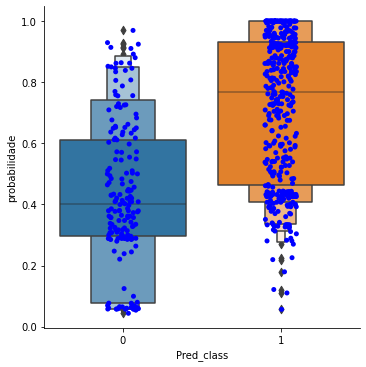

In [27]:
sns.catplot(x="Pred_class", y="probabilidade", kind="boxen", data=df);
sns.stripplot(x="Pred_class", y="probabilidade", data=df, color="blue");

In [45]:
#ordenar os dados segundo a probabilidade
df_sort_probabilidade = df.sort_values("probabilidade")
df_sort_probabilidade.head(290)

,Pred_class,probabilidade,status,True_class
416,0,0.043858,approved,74.0
33,0,0.054040,approved,0.0
337,1,0.056703,approved,74.0
308,0,0.057740,approved,0.0
309,0,0.057740,approved,0.0
...,...,...,...,...
415,1,0.600338,approved,116.0
582,1,0.601802,approved,118.0
182,1,0.602205,approved,3.0
26,0,0.603446,approved,85.0


In [46]:
#salvando os dados em um outra tabela:
df_sort_probabilidade.to_csv("/content/drive/MyDrive/Smarkio/df_sort_probabilidade.csv")

Verificando o arquivo, vemos que a probabilidade acima de 40% está depois do índice 137. Para a próxima verificação, vamos olhar os dados acima de 60%, índice a partir de 287

In [65]:
#dados acima de 40% e abaixo de 60%
acima_40 = df_sort_probabilidade.iloc[137:286,:]
#acima_40.info()
#dados acima de 60%
acima_60 = df_sort_probabilidade.iloc[287:,]
#acima_60.info()
#acima de 40%
acima = df_sort_probabilidade.iloc[137:,]
acima.info()
#print(acima_40)
#print(acima_60)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 512 to 267
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pred_class     463 non-null    int64  
 1   probabilidade  463 non-null    float64
 2   status         463 non-null    object 
 3   True_class     463 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 18.1+ KB


### Gráfico de barras

Neste ponto, com o gráfico de barras, pode-se quantificar os erros e acertos do algorítmo, tendo como base os valores acima de 40% e abaixo de 60%, os valores acima de 60% e os valores acima de 40%. A intenssão é poder quatificar, de forma empírica, uma margem segura de confiabilidade do algoritmo.

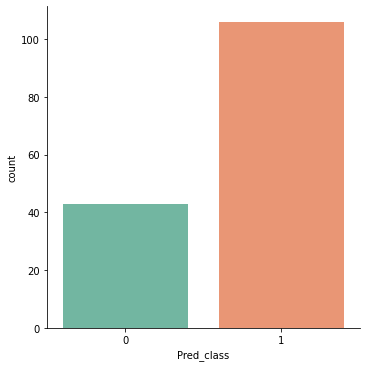

In [57]:
#Para valores acima de 40% e abaixo de 60%
sns.catplot(x="Pred_class", kind="count", palette="Set2", data=acima_40);

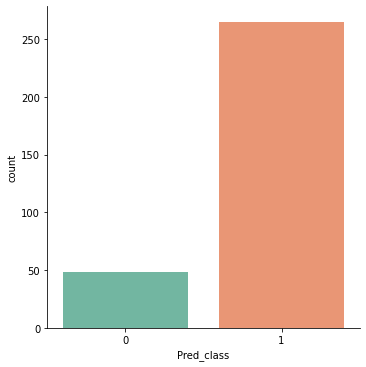

In [59]:
#Para valores acima de 60%
sns.catplot(x="Pred_class", kind="count", palette="Set2", data=acima_60);

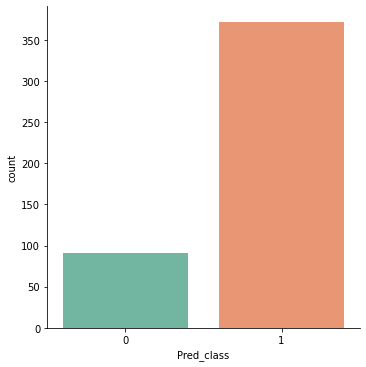

In [70]:
#Para valores acima de 40%
sns.catplot(x="Pred_class", kind="count", palette="Set2", data=acima);

### Relação entre os dados.

Por fim, vamos verificar a correlação entre as colunas do data frame para posteriormente escrever um algoritmo cross-validation k-fold de forma mais eficiente.

Neste ponto, sabemos que existe uma alta relação entre a probabilidade e a Pred_class, queremos saber se há na tabela alguma outra correlação.

> O gráfico de correlação mostra que, quanto mais clara a cor do gráfico maior será a correlação entre as colunas.

In [77]:
correlacoes = df.corr()
correlacoes

,Pred_class,probabilidade,True_class
Pred_class,1.000000,0.472416,0.172402
probabilidade,0.472416,1.000000,0.049030
True_class,0.172402,0.049030,1.000000


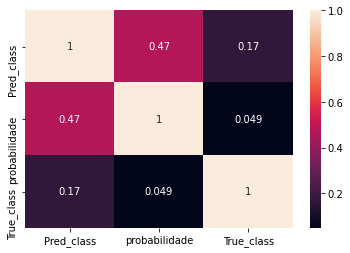

In [79]:
ax = sns.heatmap(correlacoes, annot=True)

Com isso, vemos que há uma correlação apenas entre o Pred_class e a probabilidade, correlação essa que já era nítida no começo da análise exploratória.